## **Data and Libraries Import**

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import re
import nltk
%matplotlib inline

In [2]:
from nltk import SnowballStemmer
from nltk.corpus import stopwords

In [3]:
df = pd.read_csv('/content/drive/My Drive/twitter sentiment/train.csv')

In [4]:
df.head()

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation


##**Cleaning and Analysis on Racist/Sexist Tweets** 

In [5]:
df_hate = df[df['label']==1]

In [6]:
df_hate.head()

,id,label,tweet
13,14,1,@user #cnn calls #michigan middle school 'buil...
14,15,1,no comment! in #australia #opkillingbay #se...
17,18,1,retweet if you agree!
23,24,1,@user @user lumpy says i am a . prove it lumpy.
34,35,1,it's unbelievable that in the 21st century we'...


In [7]:
df_hate.reset_index(inplace=True)

In [8]:
df_hate.head()

,index,id,label,tweet
0,13,14,1,@user #cnn calls #michigan middle school 'buil...
1,14,15,1,no comment! in #australia #opkillingbay #se...
2,17,18,1,retweet if you agree!
3,23,24,1,@user @user lumpy says i am a . prove it lumpy.
4,34,35,1,it's unbelievable that in the 21st century we'...


In [9]:
df_hate.drop('index', inplace=True, axis = 1)

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [10]:
df_hate.head()

,id,label,tweet
0,14,1,@user #cnn calls #michigan middle school 'buil...
1,15,1,no comment! in #australia #opkillingbay #se...
2,18,1,retweet if you agree!
3,24,1,@user @user lumpy says i am a . prove it lumpy.
4,35,1,it's unbelievable that in the 21st century we'...


### EDA on Data with label of Hate/ Racist/ Sexist

In [11]:
## Function for cleaning the data except the hashtags

def clean_tweet(text):
    # For removing mentions
    text = re.sub(r'@[A-Za-z0-9]+','', text) 
    
    # For removing RT
    text = re.sub(r'RT[\s]+', '', text)
    
    # For removing Hyperlinks
    text = re.sub(r'https?\/\/\S+', '', text)
    
    # Changing everthing to lowercase
    text = text.lower()
    
    return text

In [12]:
df_hate['clean_tweet'] = df_hate['tweet'].apply(clean_tweet)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [13]:
df_hate.head()

,id,label,tweet,clean_tweet
0,14,1,@user #cnn calls #michigan middle school 'buil...,#cnn calls #michigan middle school 'build the...
1,15,1,no comment! in #australia #opkillingbay #se...,no comment! in #australia #opkillingbay #se...
2,18,1,retweet if you agree!,retweet if you agree!
3,24,1,@user @user lumpy says i am a . prove it lumpy.,lumpy says i am a . prove it lumpy.
4,35,1,it's unbelievable that in the 21st century we'...,it's unbelievable that in the 21st century we'...


In [14]:
df_hate.drop(['id', 'tweet'], axis = 1, inplace=True)

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [15]:
df_hate

,label,clean_tweet
0,1,#cnn calls #michigan middle school 'build the...
1,1,no comment! in #australia #opkillingbay #se...
2,1,retweet if you agree!
3,1,lumpy says i am a . prove it lumpy.
4,1,it's unbelievable that in the 21st century we'...
...,...,...
2237,1,lady banned from kentucky mall. #jcpenny #ke...
2238,1,omfg i'm offended! i'm a mailbox and i'm pro...
2239,1,you don't have the balls to hashtag me as a ...
2240,1,"makes you ask yourself, who am i? then am i a..."


In [16]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [17]:
stopwords = stopwords.words('english')

In [18]:
stemmer = SnowballStemmer('english')

In [19]:
def stopword_remover(text, stem=False):
    
    tokens = []
    for token in text.split():
        if token not in stopwords:
            if stem:
                tokens.append(stemmer.stem(token))
            else:
                tokens.append(token)
    return " ".join(tokens)

In [20]:
df_hate.clean_tweet = df_hate.clean_tweet.apply(lambda x: stopword_remover(x))

/usr/local/lib/python3.6/dist-packages/pandas/core/generic.py:5168: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [21]:
df_hate

,label,clean_tweet
0,1,#cnn calls #michigan middle school 'build wall...
1,1,comment! #australia #opkillingbay #seashepherd...
2,1,retweet agree!
3,1,lumpy says . prove lumpy.
4,1,unbelievable 21st century we'd need something ...
...,...,...
2237,1,lady banned kentucky mall. #jcpenny #kentucky
2238,1,omfg i'm offended! i'm mailbox i'm proud! #mai...
2239,1,balls hashtag say weasel away.. lumpy tony.. d...
2240,1,"makes ask yourself, i? anybody? ....god . oh t..."


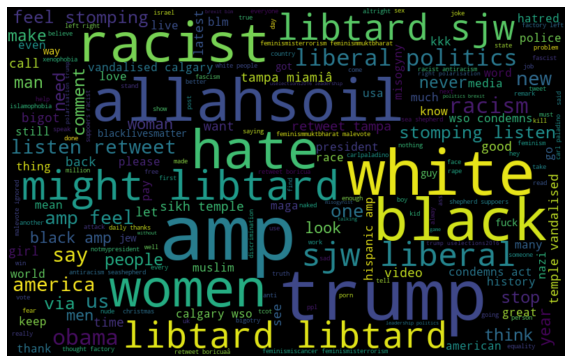

In [22]:
all_words = ' '.join([text for text in df_hate['clean_tweet']]) 
from wordcloud import WordCloud 
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_words) 
plt.figure(figsize=(10, 7)) 
plt.imshow(wordcloud, interpolation="bilinear") 
plt.axis('off') 
plt.show()

In [23]:
from collections import Counter

In [24]:
words = Counter()

for i in range(len(df_hate.clean_tweet)):
  for word in df_hate.clean_tweet[i].split():
    words[word]+=1


words.most_common()

[('&amp;', 267),
 ('â\x80¦', 160),
 ('like', 131),
 ('#trump', 119),
 ('white', 104),
 ('.', 100),
 ('#politics', 94),
 ('#allahsoil', 92),
 ('-', 81),
 ('black', 79),
 ('might', 77),
 ('#libtard', 76),
 ('#liberal', 75),
 ('#sjw', 74),
 ('libtard', 72),
 ('if...', 72),
 ('people', 65),
 ('trump', 64),
 ('racist', 63),
 ('feel', 59),
 (',', 59),
 ('new', 58),
 ('#retweet', 57),
 ('listen', 57),
 ('you?', 54),
 ('women', 50),
 ('stomping', 48),
 ('#black', 44),
 ('us', 42),
 ('via', 42),
 ('one', 41),
 ('would', 39),
 ("i'm", 38),
 ('racism', 38),
 ('#miamiâ\x80¦', 38),
 ('2', 35),
 ("can't", 34),
 ('never', 34),
 ('get', 34),
 ('sex', 34),
 ('obama', 33),
 ('woman', 33),
 ('stop', 33),
 ('think', 33),
 ('#tampa', 32),
 ('latest', 32),
 ('good', 32),
 ('comments', 31),
 ('says', 30),
 ('thanks', 30),
 ('hate', 30),
 ('video', 29),
 ('?', 29),
 ('#hate', 28),
 ('#hispanic', 28),
 ('man', 27),
 ('say', 27),
 ('#sikh', 27),
 ('act', 27),
 ('#blm', 27),
 ('go', 27),
 ('call', 26),
 ('back',

In [25]:
## Function for extracting hashtags :

def hashtags(x):
  hashtag = []
  for i in x:
    hashtags = re.findall(r'#(\w+)', i)
    hashtag.append(hashtags)
  return hashtag

In [26]:
hashtags_hate = hashtags(df_hate.clean_tweet)

In [27]:
hashtags_hate = sum(hashtags_hate, [])

In [28]:
hashtags_hate

['cnn',
 'michigan',
 'tcot',
 'australia',
 'opkillingbay',
 'seashepherd',
 'helpcovedolphins',
 'thecove',
 'helpcovedolphins',
 'neverump',
 'xenophobia',
 'love',
 'peace',
 'race',
 'identity',
 'medâ',
 'altright',
 'whitesupremacy',
 'linguistics',
 'race',
 'power',
 'raciolinguistics',
 'brexit',
 'people',
 'trump',
 'republican',
 'michelleobama',
 'knicks',
 'golfâ',
 'jewishsupremacist',
 'libtard',
 'sjw',
 'liberal',
 'politics',
 'trash',
 'hate',
 'â',
 'stereotyping',
 'prejudice',
 'hope',
 'hate',
 'conflictâ',
 'pols',
 'bluelivesmatter',
 'draintheswamp',
 'ferguson',
 '2016',
 'antisemitism',
 'hocoschools',
 'columbiamd',
 'hocomd',
 'nazi',
 'hatred',
 'bigotry',
 'libtard',
 'sjw',
 'liberal',
 'politics',
 'p2',
 'p21',
 'fyi',
 'tcot',
 'topoli',
 'blacklivesmatter',
 'ushistory',
 'eugenics',
 'biherism',
 'bigotry',
 'altright',
 'potus',
 'theresistance',
 'crime',
 'officerâ',
 'black',
 'retweet',
 'tampa',
 'miamiâ',
 'allahsoil',
 'praised',
 'clevel

In [29]:
freq = nltk.FreqDist(hashtags_hate)
freq_df = pd.DataFrame(list(freq.items()))
freq_df.columns = ['hashtags', 'count']
top_20 = freq_df.nlargest(columns='count', n=20)

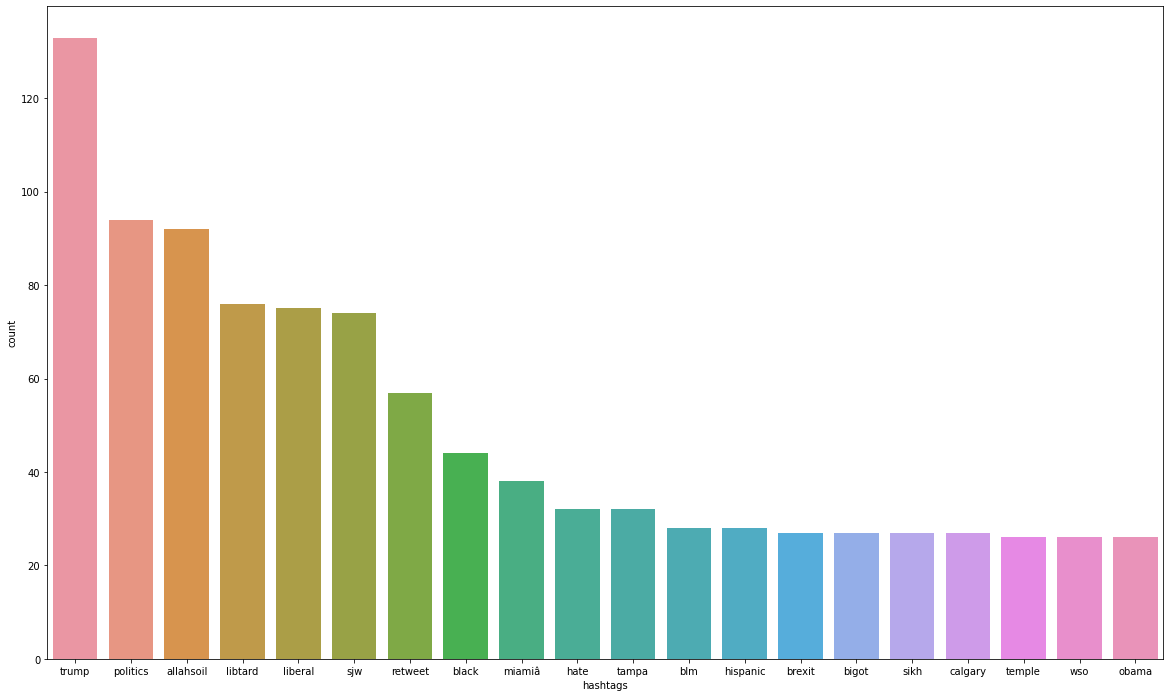

In [30]:
plt.figure(figsize=(20,12))
sns.barplot(data=top_20, x='hashtags', y='count')

In [31]:
## So here we have list of Words along with their counts which are used most often in tweets which are Racist/ Sexist in nature.

##**Cleaning and Analysis on Normal Tweets** 

In [32]:
df_normal = df[df['label']==0]

In [33]:
df_normal.head()

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation


In [34]:
df_normal.reset_index(inplace=True)
df_normal.drop('index', axis=1, inplace=True)

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [35]:
df_normal['clean_tweet'] = df_normal.tweet.apply(clean_tweet)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [36]:
df_normal.head()

,id,label,tweet,clean_tweet
0,1,0,@user when a father is dysfunctional and is s...,when a father is dysfunctional and is so sel...
1,2,0,@user @user thanks for #lyft credit i can't us...,thanks for #lyft credit i can't use cause th...
2,3,0,bihday your majesty,bihday your majesty
3,4,0,#model i love u take with u all the time in ...,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation,factsguide: society now #motivation


In [37]:
df_normal.drop(['id', 'tweet'], axis=1, inplace=True)

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [38]:
df_normal.clean_tweet = df_normal.clean_tweet.apply(lambda x: stopword_remover(x))

/usr/local/lib/python3.6/dist-packages/pandas/core/generic.py:5168: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [39]:
df_normal

,label,clean_tweet
0,0,father dysfunctional selfish drags kids dysfun...
1,0,thanks #lyft credit can't use cause offer whee...
2,0,bihday majesty
3,0,#model love u take u time urð±!!! ððð...
4,0,factsguide: society #motivation
...,...,...
29715,0,fishing tomorrow carnt wait first time 2 years
29716,0,ate isz youuu?ðððððððð...
29717,0,see nina turner airwaves trying wrap mantle ge...
29718,0,listening sad songs monday morning otw work sad


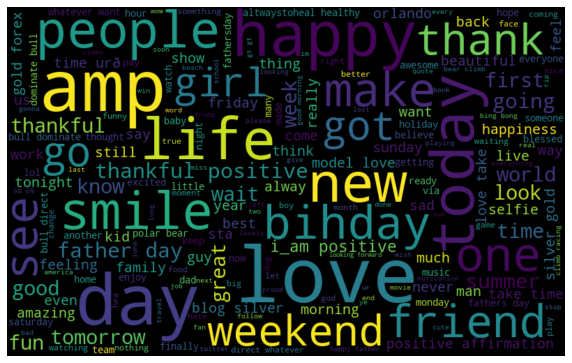

In [40]:
all_words_1 = ' '.join([text for text in df_normal['clean_tweet']]) 

wordcloud_1 = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_words_1) 
plt.figure(figsize=(10, 7)) 
plt.imshow(wordcloud_1, interpolation="bilinear") 
plt.axis('off') 
plt.show()

In [41]:
words_1 = Counter()

for i in range(len(df_normal.clean_tweet)):
  for word in df_normal.clean_tweet[i].split():
    words_1[word]+=1


words_1.most_common()

[('day', 1448),
 ('#love', 1439),
 ('happy', 1318),
 ('&amp;', 1308),
 ('-', 1164),
 ('love', 1099),
 ('u', 1092),
 ("i'm", 954),
 ('.', 904),
 ('time', 900),
 ('#positive', 870),
 ('get', 869),
 ('new', 844),
 ('like', 789),
 ('â\x80¦', 746),
 ('see', 708),
 ('good', 702),
 ("can't", 693),
 ('!', 666),
 ('one', 646),
 ('@', 629),
 ('people', 622),
 ('want', 592),
 ('take', 590),
 ('#healthy', 556),
 ('today', 539),
 ('go', 519),
 ('#smile', 514),
 ('make', 510),
 ('bihday', 505),
 ('bull', 504),
 ('life', 499),
 ('got', 498),
 ('need', 476),
 ('#thankful', 464),
 ('going', 453),
 ('thankful', 450),
 ('!!', 448),
 ('best', 438),
 ('first', 433),
 ('really', 425),
 ('great', 421),
 ('2', 416),
 ('#fun', 410),
 ('way', 397),
 ('wait', 386),
 ('#life', 376),
 ('know', 369),
 ('#affirmation', 362),
 ('#model', 360),
 ("father's", 359),
 ('back', 356),
 ('days', 353),
 ('#blog', 343),
 ('never', 341),
 ('think', 340),
 ('#summer', 340),
 ('#cute', 339),
 ('us', 334),
 ('ð\x9f\x92¦ð\x9f\x92¦

In [42]:
## Collecting hashtags using earlier hashtags function

hashtags_normal = hashtags(df_normal.clean_tweet)

In [43]:
hashtags_normal = sum(hashtags_normal, [])

In [44]:
hashtags_normal

['run',
 'lyft',
 'disapointed',
 'getthanked',
 'model',
 'motivation',
 'allshowandnogo',
 'school',
 'exams',
 'hate',
 'imagine',
 'actorslife',
 'revolutionschool',
 'girl',
 'allin',
 'cavs',
 'champions',
 'cleveland',
 'clevelandcavaliers',
 'gr8',
 'ireland',
 'blog',
 'silver',
 'gold',
 'forex',
 'orlando',
 'standwithorlando',
 'pulseshooting',
 'orlandoshooting',
 'biggerproblems',
 'selfish',
 'heabreaking',
 'values',
 'love',
 '80days',
 'gettingfed',
 'got7',
 'junior',
 'yugyoem',
 'omg',
 'thankful',
 'positive',
 'friday',
 'cookies',
 'euro2016',
 'badday',
 'coneofshame',
 'cats',
 'pissed',
 'funny',
 'laughs',
 'wine',
 'weekend',
 'tgif',
 'ff',
 'gamedev',
 'indiedev',
 'indiegamedev',
 'squad',
 'upsideofflorida',
 'shopalyssas',
 'love',
 'smiles',
 'media',
 'pressconference',
 'antalya',
 'turkey',
 'throwback',
 'ica16',
 'rip',
 'orlando',
 'alohafriday',
 'time',
 'not',
 'exist',
 'positivevibes',
 'hawaiian',
 'goodnight',
 'badmonday',
 'taylorswift1

In [45]:
freq_1 = nltk.FreqDist(hashtags_normal)
freq_df_1 = pd.DataFrame(list(freq_1.items()))
freq_df_1.columns = ['hashtags', 'count']
top_20_normal = freq_df_1.nlargest(columns='count', n=20)

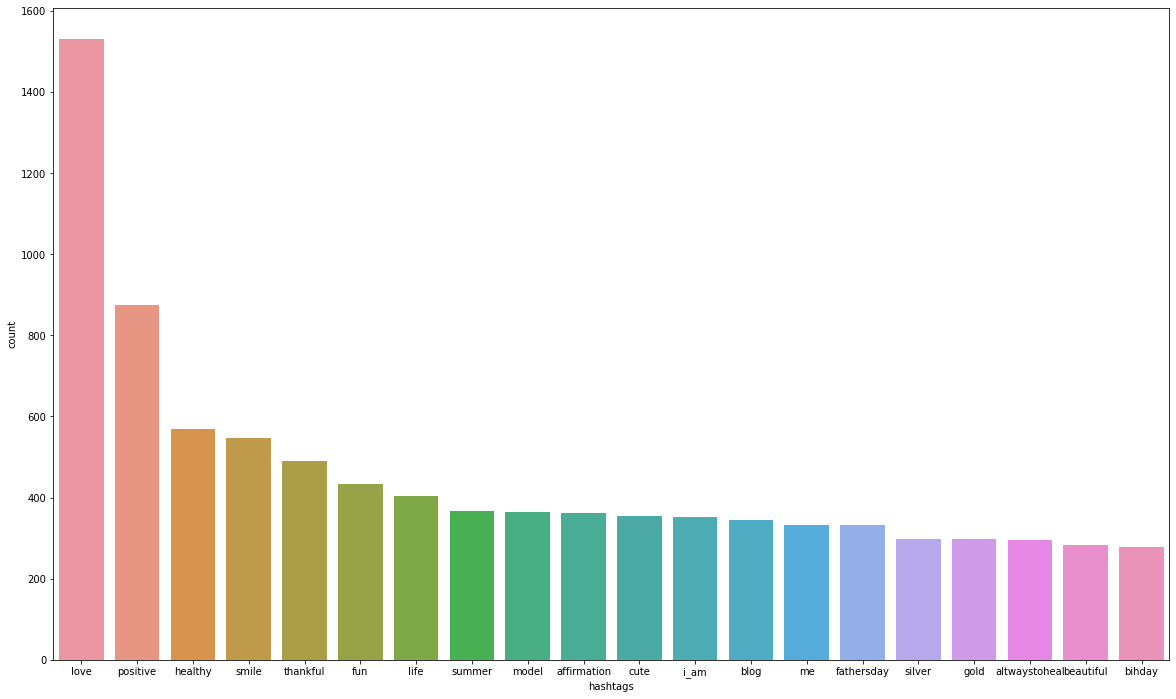

In [46]:
plt.figure(figsize=(20,12))
sns.barplot(data=top_20_normal, x='hashtags', y='count')

In [47]:
## So here we have list of Words along with their counts which are used most often in tweets which are normal in nature.